In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
import math

class muon_distribution:
    
    # constructors
    def __init__(self, lifetime):
        self.lifetime = float(lifetime)
        
    # method to return exponential distribution    
    def evaluate_md(self,t):
        return (1/self.lifetime)*math.exp(-t/self.lifetime)
    
    # method to return maximum value of distribution  
    def maximum(self):
        return 1.0/self.lifetime
    
    # method to return random number with distribution
    # choose numpy random exponential or custom code 'calum'    
    def random_val(self,choice='calum'):
        
        # in built numpy method for generating random number in a exponential distribution
        if choice=='numpy':
            x1 = np.random.exponential(scale=self.lifetime)        
        # box method for generating random number in a exponential distribution
        elif choice=='calum':
            x1 = 0 
            y1 = 0
            y2 = 1
        
            while ( y2 > y1 ):
                x1 = np.random.uniform() 
                x1 = x1*self.lifetime*10.
                y1 = self.evaluate_md(x1)
                y2 = np.random.uniform() * self.maximum()
            

        return x1
    
    # integrates area under the curve, in this example should be normalised
    # therefore always roughly equal to 1
    def numeric_integral(self,lo,hi,npoints=100000):
        
        sumf = 0
        
        for i in range(0,npoints):
            x = lo+np.random.uniform()*(hi-lo)
            sumf += self.evaluate_md(x)
            
        return sumf*(hi-lo)/npoints
    
    # performs an observation by taking n_muons random values
    # of the distribution
    def observation(self,choice='numpy',n_muons=1000):
        results = []
        for i in range(0,n_muons):
            results.append(self.random_val(choice=choice))
        # average decay time, result list
        return np.mean(results), results

In [4]:
test = muon_distribution(2.2)

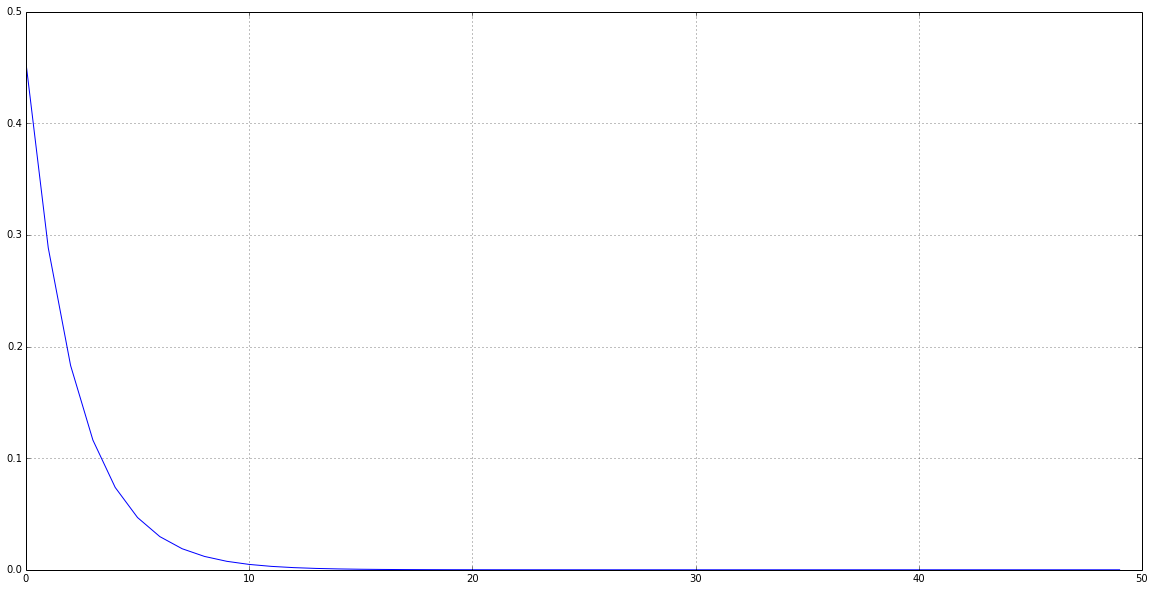

In [5]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot([x for x in range(0,50)],[test.evaluate_md(x) for x in range(0,50)],'-')

In [6]:
val, results = test.observation()  

(500,)

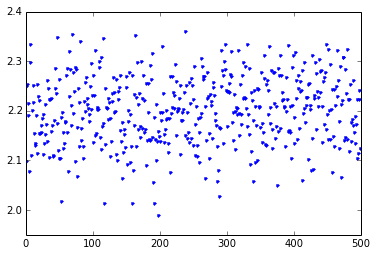

In [14]:
plt.plot(results,'.')
np.array(results).shape

(0, 20)

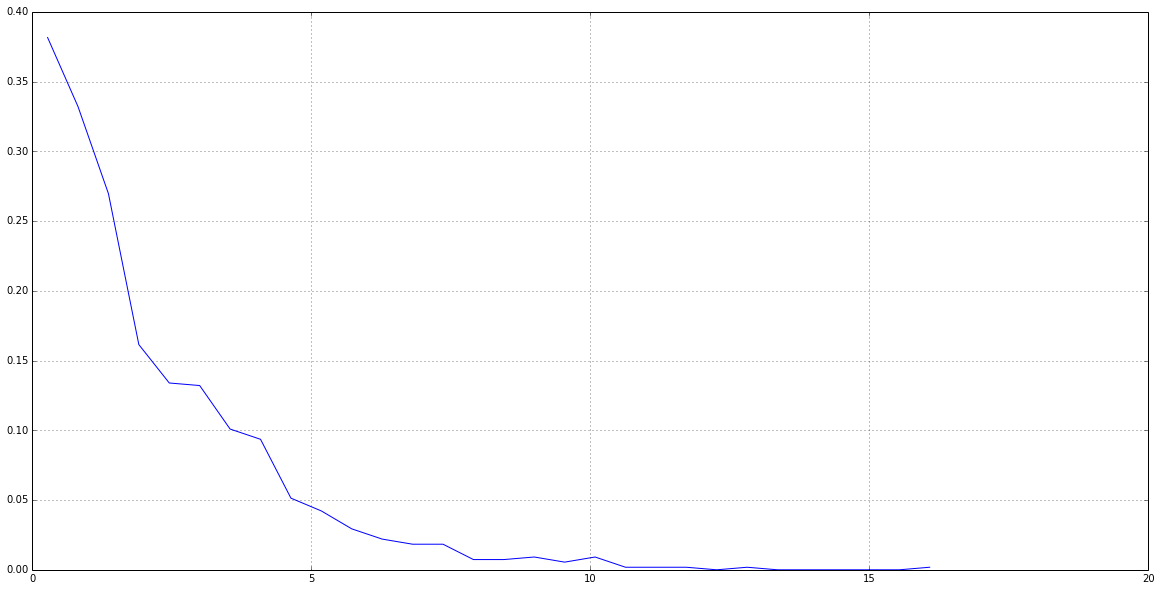

In [7]:
n, bins = np.histogram(results, bins=30, normed=True)

plt.figure(figsize=(20,10))
step = (bins[1]-bins[0])/2
plt.plot(bins[1:]-step,n)
plt.grid(True)
plt.xlim(0,20)

In [8]:
test = muon_distribution(2.2)
results = []
for _ in range(500):
    results.append(test.observation()[0])

In [9]:
error_mean = math.sqrt(np.var(results)/len(results))
len(results), np.mean(results), error_mean

(500, 2.201374258631791, 0.0030332098073651776)

(0, 8)

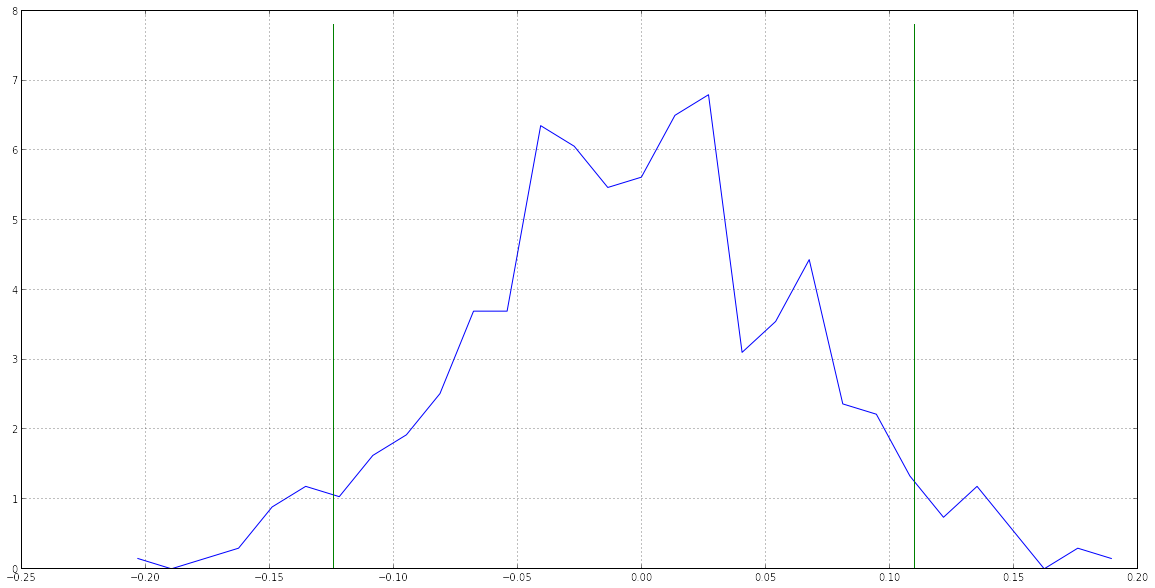

In [38]:
n, bins = np.histogram(np.array(results)-test.lifetime, bins=30, normed=True)

plt.figure(figsize=(20,10))
step = (bins[1]-bins[0])/2
plt.plot(bins[1:]-step,n)
plt.grid(True)
line = bins[1:]-step
plt.plot([np.mean(line)-np.std(line),np.mean(line)-np.std(line)],[0,np.max(n)+1],'g-')
plt.plot([np.mean(line)+np.std(line),np.mean(line)+np.std(line)],[0,np.max(n)+1],'g-')
plt.ylim(0,8)

In [40]:
test = muon_distribution(2.2)
results = []
for _ in range(0,500):
    results.append(test.observation(choice='calum')[0])

In [41]:
error_mean = math.sqrt(np.var(results)/len(results))
len(results), np.mean(results), error_mean

(500, 2.1944120961588878, 0.0030874463668524926)

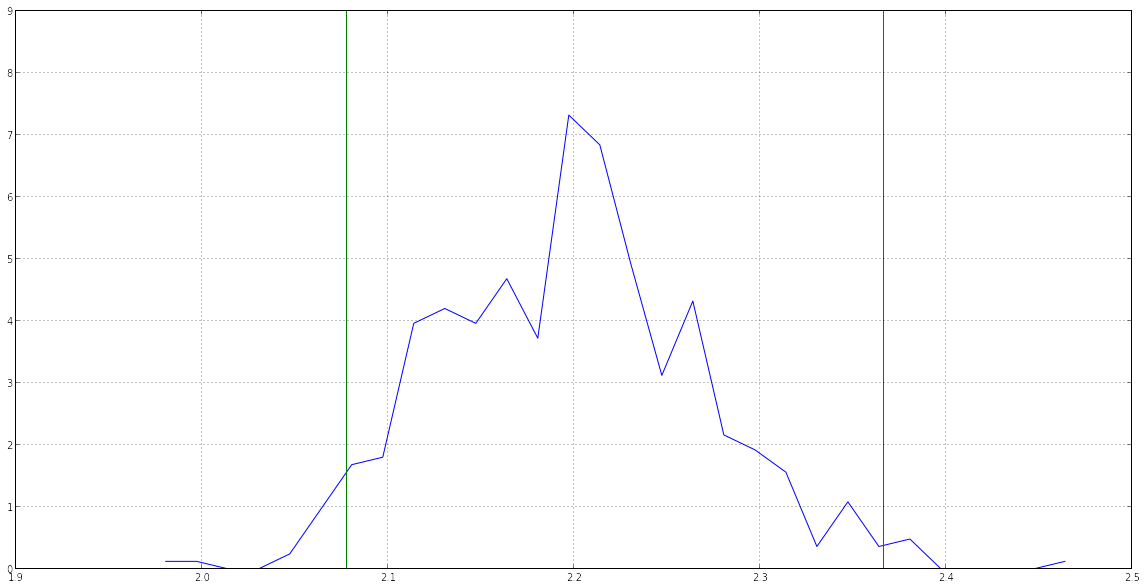

In [26]:
n, bins = np.histogram(results, bins=30, normed=True)

plt.figure(figsize=(20,10))
step = (bins[1]-bins[0])/2
plt.plot(bins[1:]-step,n)
plt.grid(True)
line = bins[1:]-step
plt.plot([np.mean(line)-np.std(line),np.mean(line)-np.std(line)],[0,9],'g')
plt.plot([np.mean(line)+np.std(line),np.mean(line)+np.std(line)],[0,9],'g')

In [27]:
test = muon_distribution(10.2)
large_results = []
for _ in range(0,50000):
    large_results.append(test.observation()[0])
    
print(len(large_results), np.mean(large_results), np.var(large_results))

(50000, 10.197364229013456, 0.10381740655512413)


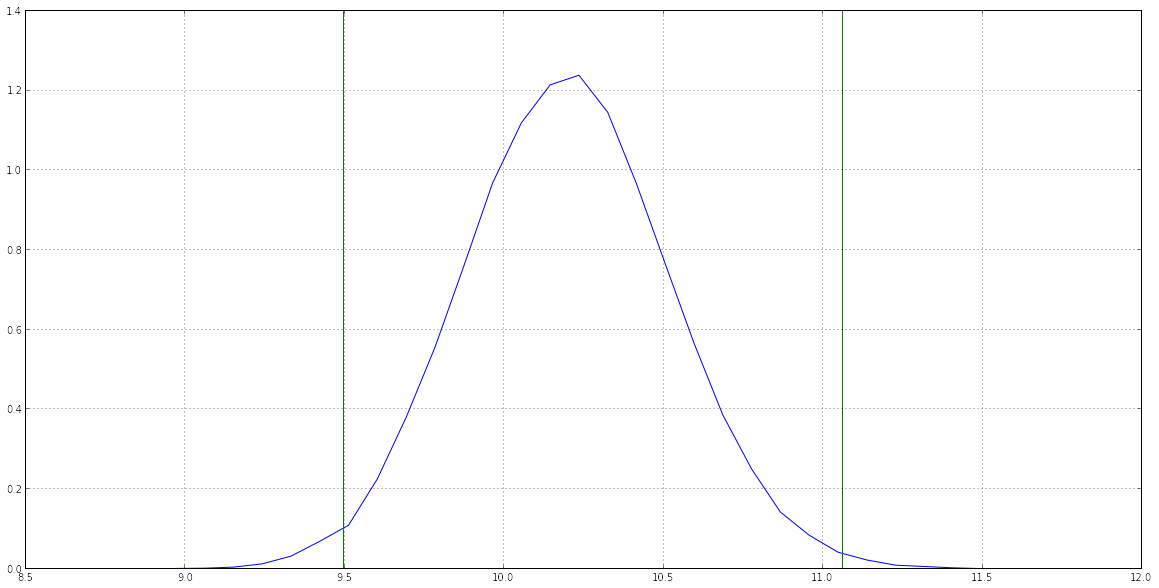

In [39]:
n, bins = np.histogram(large_results, bins=30, normed=True)

plt.figure(figsize=(20,10))
step = (bins[1]-bins[0])/2
plt.plot(bins[1:]-step,n)
plt.grid(True)
line = bins[1:]-step
plt.plot([np.mean(line)-np.std(line),np.mean(line)-np.std(line)],[0,1.4],'g-')
plt.plot([np.mean(line)+np.std(line),np.mean(line)+np.std(line)],[0,1.4],'g-')